<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Tensorflow基础" data-toc-modified-id="Tensorflow基础-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Tensorflow基础</a></span></li><li><span><a href="#Tensorflow-常量" data-toc-modified-id="Tensorflow-常量-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Tensorflow 常量</a></span></li><li><span><a href="#Tensorflow变量" data-toc-modified-id="Tensorflow变量-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Tensorflow变量</a></span></li><li><span><a href="#Fetches-取回" data-toc-modified-id="Fetches-取回-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Fetches 取回</a></span></li><li><span><a href="#Feeds供给" data-toc-modified-id="Feeds供给-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Feeds供给</a></span></li><li><span><a href="#Tensorboard可视化" data-toc-modified-id="Tensorboard可视化-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Tensorboard可视化</a></span></li><li><span><a href="#Tensorflow拟合平面" data-toc-modified-id="Tensorflow拟合平面-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Tensorflow拟合平面</a></span></li><li><span><a href="#tensorflow实现手写数字识别" data-toc-modified-id="tensorflow实现手写数字识别-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>tensorflow实现手写数字识别</a></span><ul class="toc-item"><li><span><a href="#mnist数据" data-toc-modified-id="mnist数据-0.8.1"><span class="toc-item-num">0.8.1&nbsp;&nbsp;</span>mnist数据</a></span></li><li><span><a href="#SoftMax介绍" data-toc-modified-id="SoftMax介绍-0.8.2"><span class="toc-item-num">0.8.2&nbsp;&nbsp;</span>SoftMax介绍</a></span></li><li><span><a href="#实现回归模型" data-toc-modified-id="实现回归模型-0.8.3"><span class="toc-item-num">0.8.3&nbsp;&nbsp;</span>实现回归模型</a></span></li></ul></li></ul></li></ul></div>

## Tensorflow基础
TensorFlow命名来源于本身的运行原理。Tensor（张量）意味着N维数组，Flow（流）意味着基于数据流图的计算，TensorFlow代表着张量从图象的一端流动到另一端计算过程，是将复杂的数据结构传输至人工智能神经网中进行分析和处理的过程。

TensorFlow的几个比较重要的概念：tensor, computation graphy, node, session。正如前面所说，整个操作就好像数据（tensor）在计算图（computation graphy）中沿着边(edge)流过（flow）一个个节点（node），然后通过会话（session）启动计算。所以简单来说，要完成这整个过程，我们需要的东西是要定义数据、计算图和计算图上的节点，以及启动计算的会话。所以在实际使用中我们要做的大部分工作应该就是定义这些内容了。

张量（tensor）是TensorFlow中的基本数据结构，它存储任意维数的数据，类似于NumPy中的多维数组。 张量有三种基本类型：常量，变量和占位符。 ·常量（constant）是张量不变的类型。 他们可以被看作没有输入的节点，输出他们存储在内部的单个值。 ·变量（Variable）是可变类型的张量，其值可以在图形运行期间改变。在机器学习应用中，变量通常存储需要优化的参数（例如，神经网络中节点之间的权重）。变量需要在运行图形之前通过调用一个特殊的操作来初始化。 ·占位符（placeholder）是存储来自外部数据的张量的张量。它们代表了一个“承诺”，即在图形运行时将提供一个值（feed）。在机器学习应用中，占位符通常用于向学习模型输入数据。

## Tensorflow 常量

In [ ]:
import tensorflow as tf

In [ ]:
#生成两个常量
mat1=tf.constant([[3.,3.],[4.,4.]],name='mat1_constant')
print (mat1)
mat2=tf.constant([[2.],[2.]],name='mat2_constant')
#矩阵相乘
product=tf.matmul(mat1,mat2,name='product')
print (product)
sess=tf.Session()
result=sess.run(product,feed_dict={mat1:[[2,3],[3,4]],mat2:[[3],[3]]})
print(result)
sess.close()

# with tf.Session() as sess:
#     result=sess.run(product)
#     print(result)

## Tensorflow变量 

In [ ]:
#Variables变量
import tensorflow as tf

#定义一个变量
state = tf.Variable(0, name="counter")
#定义一个常量
one = tf.constant(1)
#连个tensor相加
new_value = tf.add(state, one)
#更新state值为new_value
update = tf.assign(state, new_value)
#初始化变量
# init_op=tf.initialize_all_variables()#老版本初始化变量
init_op = tf.global_variables_initializer()#新版本初始化变量
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

## Fetches 取回 

In [ ]:
#Fetches 取回
import tensorflow as tf
#定义三个常量
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0) 
#定义两个op
intermed = tf.add(input2, input3) 
mul = tf.multiply(input1, intermed)
with tf.Session() as sess:
    result = sess.run([mul, intermed]) 
    print(result)

## Feeds供给 

In [ ]:
#Feeds供给
import tensorflow as tf
#定义两个占位符
input1 = tf.placeholder(tf.float32) 
input2 = tf.placeholder(tf.float32) 
#定义一个相乘的op
output = tf.multiply(input1, input2)
#session
with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))
    #用feed_dict供给需计算的数据
    #[output],fetch数据到output


##  Tensorboard可视化

In [2]:
#生成两个常量
import tensorflow as tf
tf.reset_default_graph()
mat1=tf.constant([[3.,3.],[4.,4.]],name='mat1_constant')
print (mat1)
mat2=tf.constant([[2.],[2.]],name='mat2_constant')
#矩阵相乘
product=tf.matmul(mat1,mat2,name='product')
print (product)
sess=tf.Session()
tf.summary.histogram('mat1',mat1)
tf.summary.histogram('mat2',mat2)
tf.summary.histogram('product',product)
merged_summary_op = tf.summary.merge_all()
summary_writer = tf.summary.FileWriter('d:/tensor_log/sam2',sess.graph)

result=sess.run(product,feed_dict={mat1:[[2,3],[3,4]],mat2:[[3],[3]]})
print(result)
st=sess.run(merged_summary_op)
summary_writer.add_summary(st)
sess.close()

Tensor("mat1_constant:0", shape=(2, 2), dtype=float32)
Tensor("product:0", shape=(2, 1), dtype=float32)
[[ 15.]
 [ 21.]]


## Tensorflow拟合平面

In [ ]:

import tensorflow as tf
import numpy as np

# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300
# print (x_data)
# print (y_data)
# 构造一个线性模型
b = tf.Variable(tf.zeros([1]))
W= tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.3)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in range(0, 201):
    sess.run(train)
    
    if step % 20 == 0:
        print (step, sess.run(W), sess.run(b))

# 得到最佳拟合结果 W: [[0.100  0.200]], b: [0.300]

## tensorflow实现手写数字识别

### mnist数据

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True);

下载下来的数据集被分成两部分：60000行的训练数据集（mnist.train）和10000行的测试数据集（mnist.test）

每一个MNIST数据单元有两部分组成：一张包含手写数字的图片和一个对应的标签。训练数据集的图片是 mnist.train.images ，训练数据集的标签是 mnist.train.labels

每一张图片包含28像素X28像素。我们可以用一个数字数组来表示这张图片：
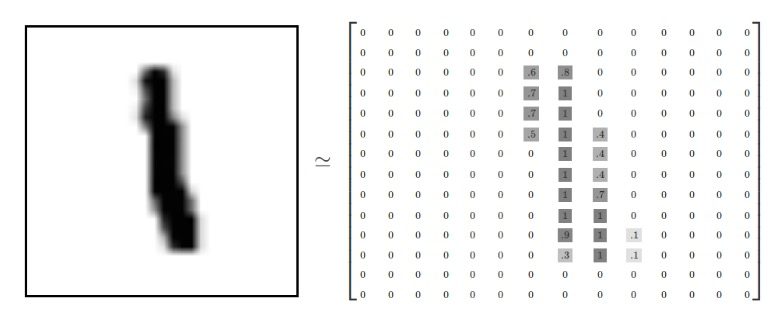

数组展开成一个向量，长度是 28x28 = 784

在MNIST训练数据集中，mnist.train.images 是一个形状为 [60000, 784] 的张量，第一个维度数字用来索引图片，第二个维度数字用来索引每张图片中的像素点。

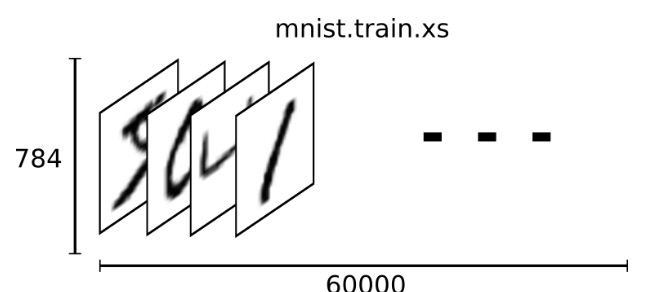

数字n将表示成一个只有在第n维度（从0开始）数字为1的10维向量。比如，标签0将表示成([1,0,0,0,0,0,0,0,0,0,0])（one_hot)。因此， mnist.train.labels 是一个 [60000, 10] 的数字矩阵。

### SoftMax介绍

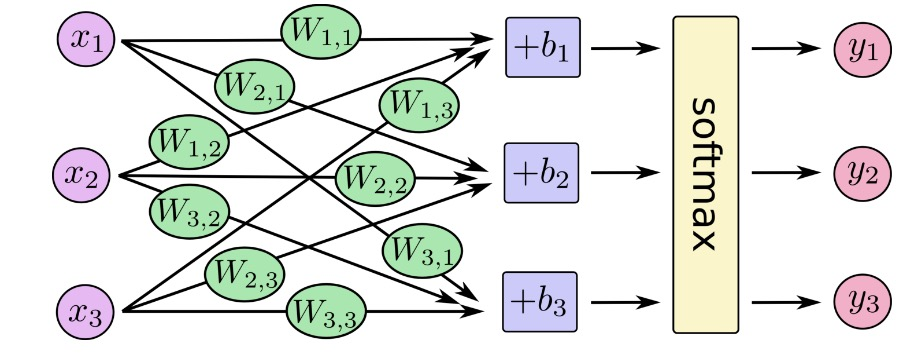

写成公式：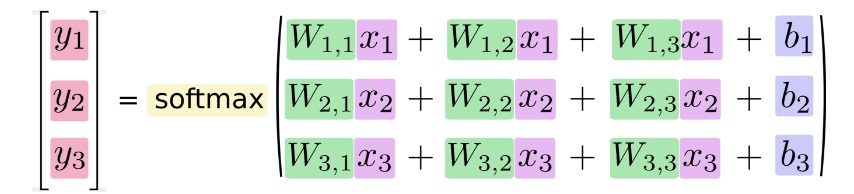

可以用矩阵相乘和向量相加来表示：
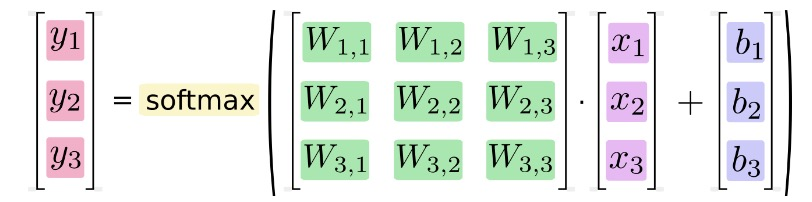

可以写成$$y=softmax(Wx+b)$$

### 实现回归模型

下载数据

In [4]:
import tensorflow as tf
import numpy as np 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


用tensorboard绘制可视化图

In [5]:
tf.reset_default_graph()
#建立图
#with tf.name_scope定义命名空间，使可视化图更加易于阅读
with tf.name_scope('Input'):
    #定义一个占位符[None,784]的矩阵，表示任意数量的图像，每一张图展平成784维的向量
    x = tf.placeholder(tf.float32,shape = [None,784],name = 'x_Graph_Matrix');
    #定义一个占位符[None,10]的矩阵,表示任意数量的图像结果，用one_hot来表示结果
    y_ = tf.placeholder(tf.float32,shape = [None,10],name = 'y_Num_Matrix');
with tf.name_scope('Calc_get'):
    #定义一个占位符[784,10]的矩阵，用于权重
    W = tf.Variable(tf.zeros([784,10]),name='Weights');
    #定义一个偏置量
    b = tf.Variable(tf.zeros([10]),name = 'biases');
#定义图形输出    
with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)
#定义softmax的op
y = tf.nn.softmax(tf.matmul(x,W) + b,name='SoftMax')
#计算交叉熵
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
#可视化图展示损失函数的变化
tf.summary.scalar('loss_function', cross_entropy)
#####optimization:梯度下降
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#set sess as default
sess = tf.InteractiveSession(config= tf.ConfigProto(log_device_placement=True))
#sess里加入这个参数config= tf.ConfigProto(log_device_placement=True)，则能看见sess使用什么硬件进行计算
#初始化变量
init = tf.global_variables_initializer();
sess.run(init);
####TensorBoard画图
merged_summary_op = tf.summary.merge_all()
summary_writer = tf.summary.FileWriter('d:/tensor_log',sess.graph)
saver=tf.train.Saver()
###让模型循环训练1000次
for i in range(1000):
    ###从训练集中随机取出100个批处理数据点进行训练
    batch = mnist.train.next_batch(100);
    ###训练，用feed机制送数据
    sess.run(train_step,feed_dict={x: batch[0], y_: batch[1]});
    
    ####tensorboard画图
    summary_str = sess.run(merged_summary_op,feed_dict={x: batch[0], y_: batch[1]});
    summary_writer.add_summary(summary_str, i);
#     saver.save(sess,'/Users/zxd/tensor_log',i)
    ###每50次训练，用训练所得的模型测试数据，计算正确率
    if i % 50 == 0:
        ###tf.argmax能给出某个tensor对象在某一维上的其数据最大值所在的索引值
        ###tf.argmax(y,1)返回的是模型对于任一输入x预测到的标签值
        ###tf.argmax(y_,1)是正确的标签
        ###tf.equal检测两者是否匹配
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        ###tf.cast(correct_prediction, "float")，把得到的bool值转换成浮点数,[1,0,1,1]
        ###tf.reduce_mean求平均，得到正确率。
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))
        print ("Setp: ", i, "Accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))




########evaluate
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(session=sess,feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
sess.close()

Setp:  0 Accuracy:  0.4322
Setp:  50 Accuracy:  0.8862
Setp:  100 Accuracy:  0.8945
Setp:  150 Accuracy:  0.9029
Setp:  200 Accuracy:  0.9004
Setp:  250 Accuracy:  0.9086
Setp:  300 Accuracy:  0.9092
Setp:  350 Accuracy:  0.9071
Setp:  400 Accuracy:  0.9074
Setp:  450 Accuracy:  0.9057
Setp:  500 Accuracy:  0.9173
Setp:  550 Accuracy:  0.9098
Setp:  600 Accuracy:  0.9167
Setp:  650 Accuracy:  0.9167
Setp:  700 Accuracy:  0.9165
Setp:  750 Accuracy:  0.904
Setp:  800 Accuracy:  0.9167
Setp:  850 Accuracy:  0.9107
Setp:  900 Accuracy:  0.9004
Setp:  950 Accuracy:  0.9127
0.9191


可得到损失函数图像：
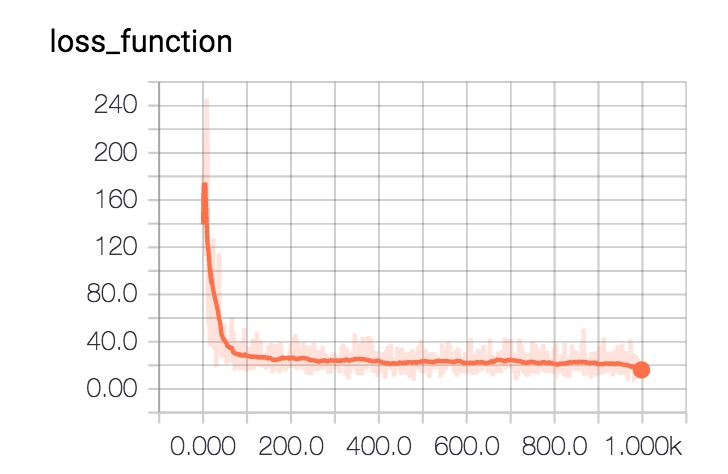

整个tensor图
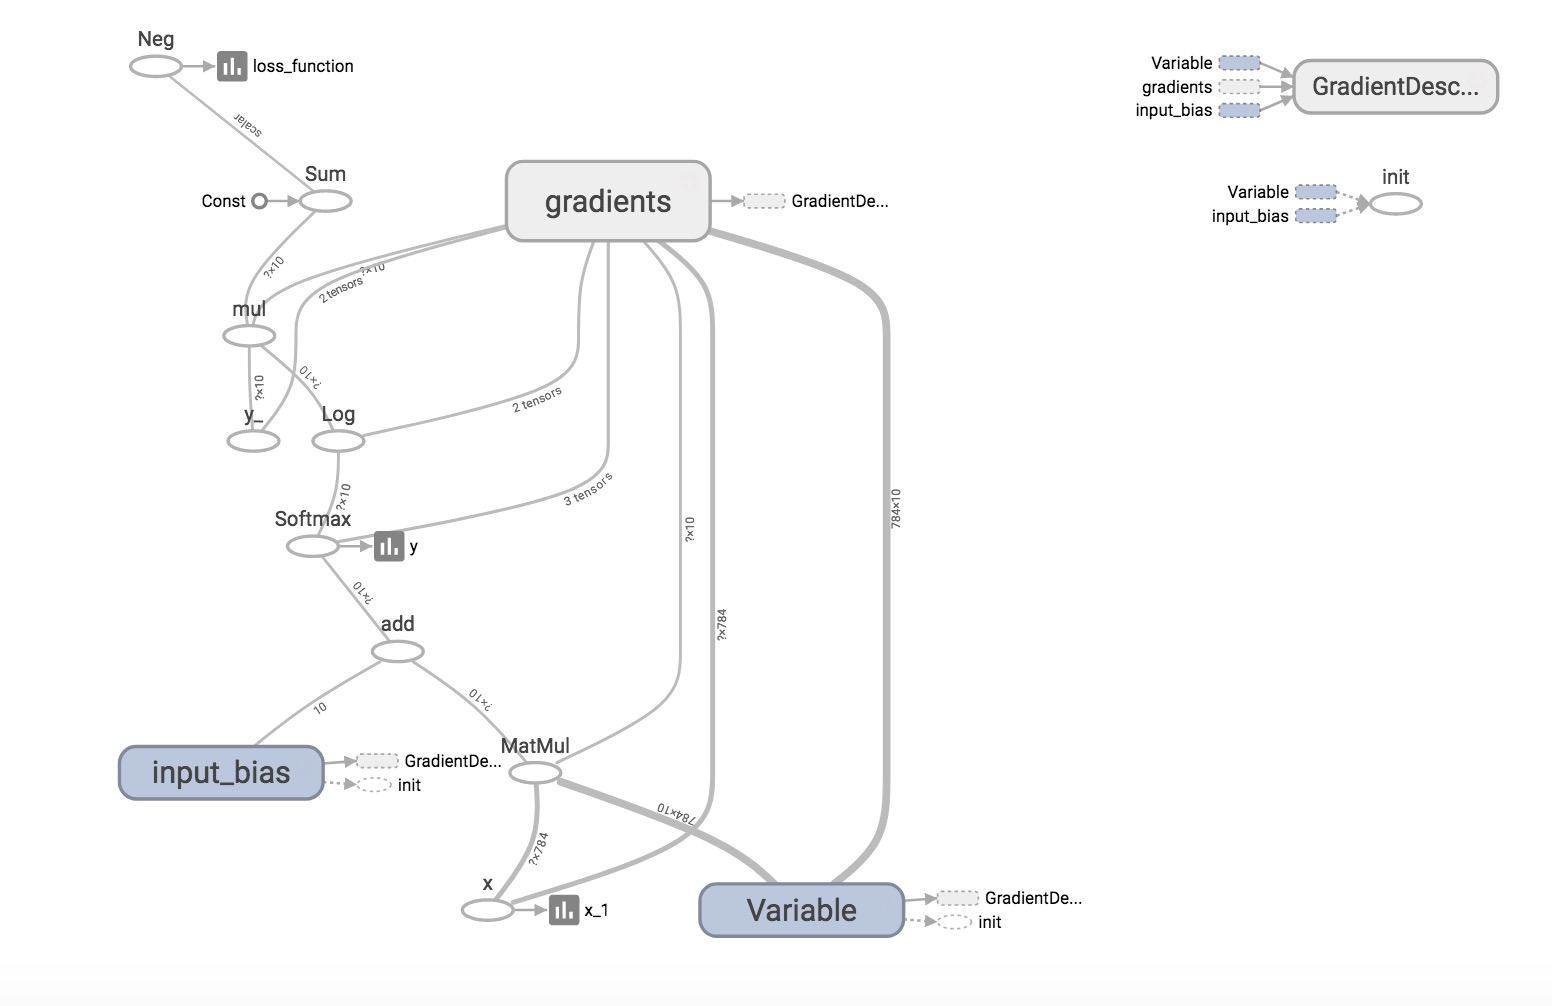

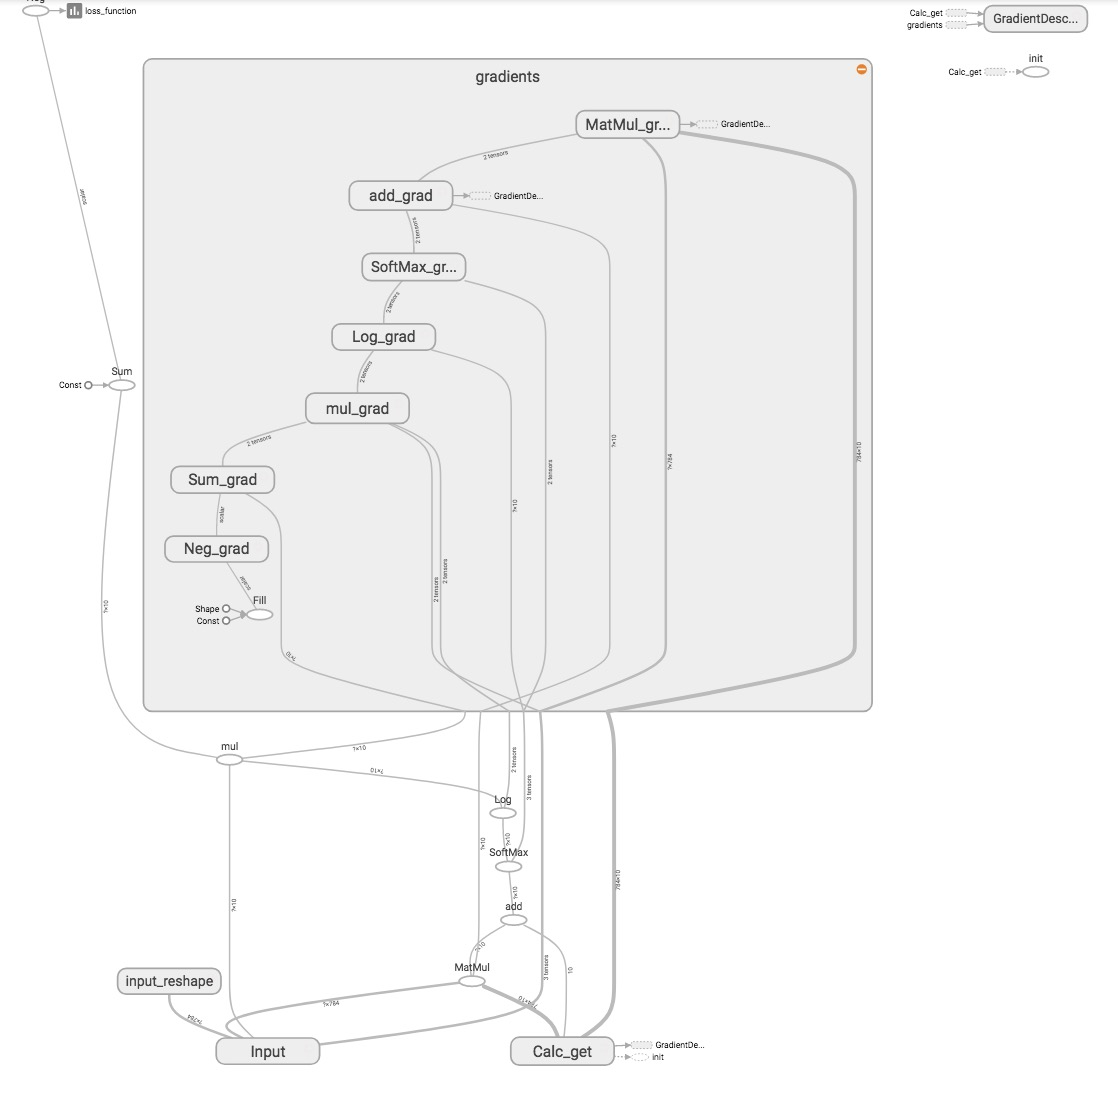